In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import os
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb


from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

In [2]:
df = pd.read_csv('rbess_features_val.csv', index_col = 'accounts addresses')

In [3]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,predictor
accounts addresses,,,,,,,,,,,,,,,,
103,257.60,252.63,277.98,276.22,281.88,280.55,34,32541,176525,526.11,532.89,476.92,490.43,451.38,471.29,1
616,126.85,111.16,265.39,267.40,280.57,279.35,3,1897,92166,331.61,328.51,471.94,489.86,456.02,474.70,1
9,267.50,268.45,280.59,278.13,281.85,280.47,94,69558,210184,469.86,491.67,457.03,474.64,452.14,471.63,1
424,50.32,458.47,273.52,271.78,279.91,278.93,1,1454,78784,150.50,414.39,499.87,520.01,455.46,473.62,1
38,272.70,270.47,279.91,278.93,281.93,280.74,111,77330,214882,503.03,520.97,455.46,473.62,451.73,471.88,1


In [4]:
X = df.iloc[:, :-1]
y = df['predictor']

In [5]:
# Для оценки качества полученной классификации рассмотрим матрицу ошибок.
"""
    Функция conf_matrix для расчета TP (true positives), FP (false positives), TN (true negatives), FN (false negatives)  
    y_true: массив array, истинные отклики
    y_true: массив array, предсказанные классификатором отклики
"""

def conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels = ['Не мошенник', 'Мошенник'])
    disp.plot(cmap='Greens')
    plt.rcParams["axes.grid"] = False
    font = {'size' : 12}
    plt.rc('font', **font)
    plt.show()

In [6]:
# Разделим на обучающую и тестовую выборки
# При построении деревьев стандартизация не нужна, сразу разделяем на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 21, test_size = 0.33)

На тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       441
           1       0.08      0.33      0.13         6

    accuracy                           0.94       447
   macro avg       0.54      0.64      0.55       447
weighted avg       0.98      0.94      0.96       447



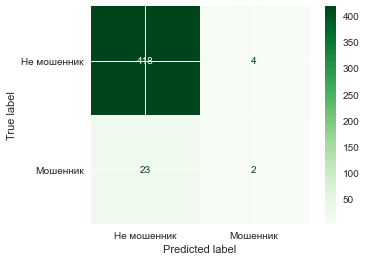

In [7]:
# Задаем параметры модели
clf = DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_depth=5,
                               max_leaf_nodes=None,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               )
clf.fit(X_train, y_train)

# Построим предсказания для обучащей и тестовой выборок
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)

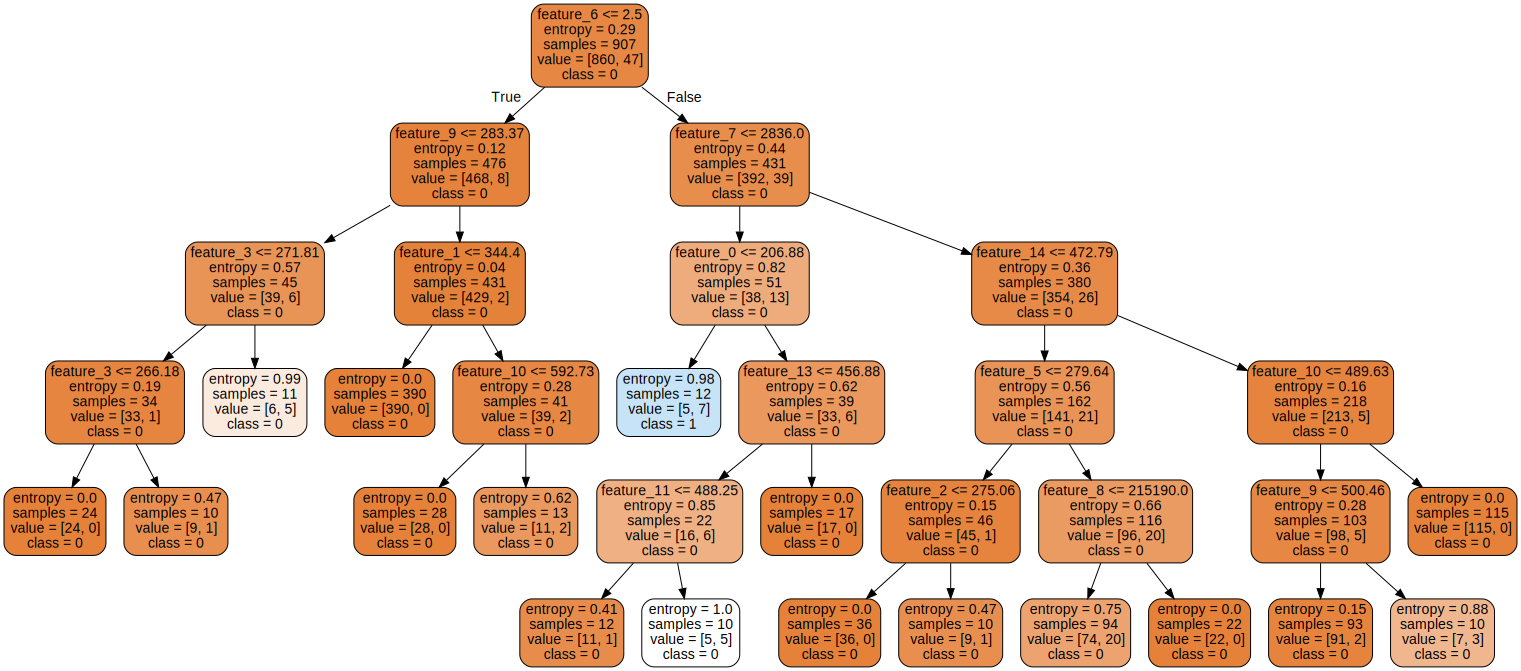

In [8]:
columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

# Строим визуализацию дерева. Разделение идет по признаку, где наибольший прирост информации
graphviz.Source(dot_graph)

In [9]:
# Разделим на обучающую и тестовую выборки, СТРАТИФИЦИРОВАННО (т.е. соотношение классов в трейне и тесте
# одинаковое)
# При построении деревьев стандартизация не нужна, сразу разделяем на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 21, test_size = 0.33, stratify = y)

На тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       444
           1       0.08      0.67      0.15         3

    accuracy                           0.95       447
   macro avg       0.54      0.81      0.56       447
weighted avg       0.99      0.95      0.97       447



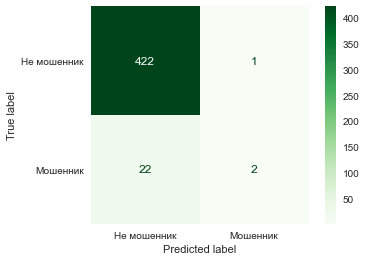

In [10]:
# Задаем параметры модели ТЕ ЖЕ САМЫЕ
clf = DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_depth=5,
                               max_leaf_nodes=None,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               )
clf.fit(X_train, y_train)

# Построим предсказания для обучащей и тестовой выборок
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)

Результаты для стратифицированного разбиения стали лучше. В дальнейшем будем использовать именно такой трейн и тест

In [11]:
# Строим первоначальную модель для дальнейшего подбора гиперпараметров
model_grid = DecisionTreeClassifier(random_state=21,
                               criterion='entropy',
                               max_depth=5,
                               max_leaf_nodes=None,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               class_weight={0: 1, 1: 2}
                               )

In [12]:
#   Определяем интересующие значения гиперпараметров
# Везде я использую в качестве меры неопределенности/загрязненности энтропию
params_set = {
'max_depth': [4, 5, 6],
'min_samples_leaf': [10, 20, 30],
'min_samples_split': [10, 15, 20],
'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 3}]
}

#   Проводим 5-fold кросс-валидацию со стратификацией из-за несбалансированности классов
#   Качество моделей сравниваем с помощью f меры
grid_CV = GridSearchCV(estimator=model_grid,
       param_grid=params_set,
       scoring='f1_macro',
       cv= StratifiedKFold(n_splits=5))

#   Обучение на обучающей выборке
grid_CV.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 2},
                                              criterion='entropy', max_depth=5,
                                              min_samples_leaf=10,
                                              min_samples_split=20,
                                              random_state=21),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 4},
                                          {0: 1, 1: 3}],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 15, 20]},
             scoring='f1_macro')

In [13]:
#   Лучший набор значений гиперпараметров
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'class_weight': {0: 1, 1: 4}, 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [14]:
# Лучшая модель
best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_f1 = f1_score(y_train, y_pred_train, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')

# Значение критерия качества для лучших значений гиперпараметров 
print('Лучшее значение f меры на тестовом множестве', round(train_f1,3))
print('Лучшее значение f меры на тестовом множестве', round(test_f1,3))

Лучшее значение f меры на тестовом множестве 0.664
Лучшее значение f меры на тестовом множестве 0.551


На тестовой выборке:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       410
           1       0.21      0.14      0.16        37

    accuracy                           0.89       447
   macro avg       0.57      0.54      0.55       447
weighted avg       0.87      0.89      0.87       447



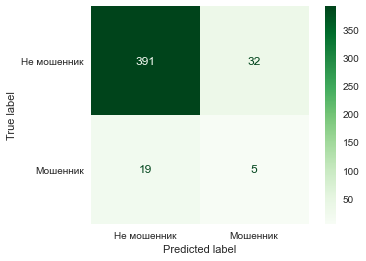

In [15]:
print('На тестовой выборке:')
print(classification_report(y_pred_test, y_test))
conf_matrix(y_test, y_pred_test)

Для сравнения результаты градиентного бустинга

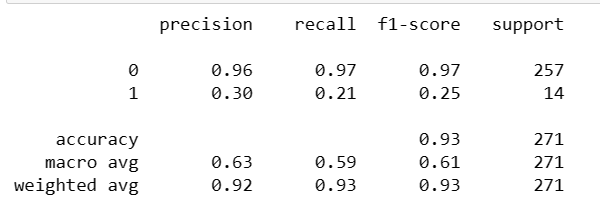

In [16]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,feature_6,0.238370
9,feature_9,0.236542
14,feature_14,0.136312
10,feature_10,0.113258
1,feature_1,0.090286
0,feature_0,0.081478
8,feature_8,0.080134
3,feature_3,0.023619
2,feature_2,0.000000
4,feature_4,0.000000


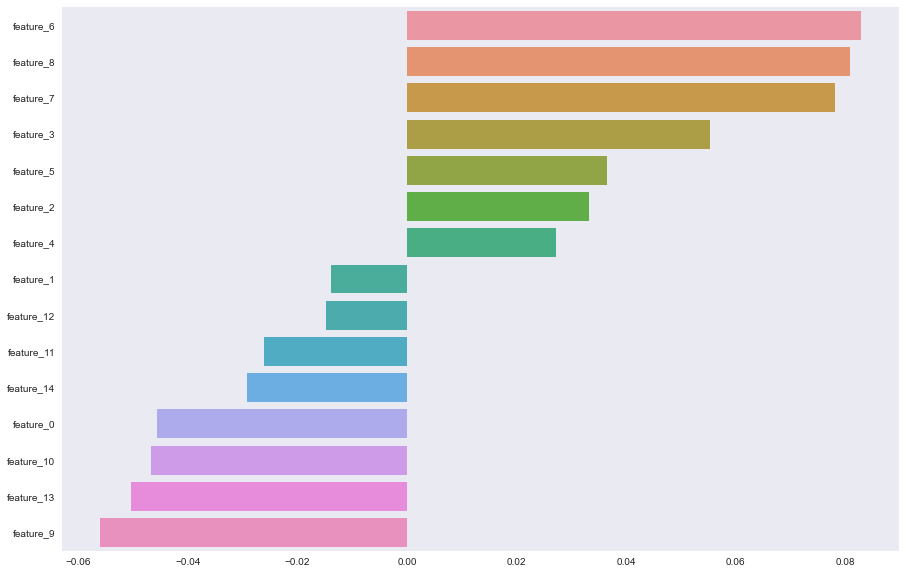

In [17]:
# Корреляция признаков с откликом на трейне
correlations = X_train.corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Видна статистическая взаимосвязь некоторых признаков с откликом на данном обучающем наборе. Не является гарантией наличия причинно-следственной взаимосвязи